# ANALIZA DANYCH ZWIĄZANYCH Z WYCENĄ ZAWODNIKÓW PREMIER LEAGUE W SEZONIE 2018/2019 

Na podstawie danych, które wcześniej zostały obrobione, niestety nie w Pythonie tylko Excelu(związane to było z tym, że łączyłem ze sobą dane z dwóch źródeł, do każdego zawodnika musiałem dopasować wycenę doszukując po nazwiskach, które nie zawsze do końca się pokrywały, dlatego uznałem to za zbyt ciężkie do wykonania w Pythonie). Dane te zostały zwizualizowany, a przynajmniej ta część, którą uznałem za najbardziej istotną. Dodatkowo wykonałem regresję liniową na załączonych danych. Jeden z problemów na jaki się natknąłem, było sprawdzenie linowej formy funkcyjnej testem Harveya-Colliera. Wyskakiwał mi błąd, dlatego sprawdziłem to za pomocą testu RESET w R, o czym wspomniane jest poniżej.

Zaimportowano niezbędne biblioteki

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm
from string import ascii_letters
import statsmodels.formula.api as smf

In [119]:
data=pd.read_excel('premier_league_value_5.xlsx')
display(data)

,market_value,age,position,position_in_league,minutes_played_overall,appearances_overall,goals_overall,assists_overall,clean_sheets_overall,yellow_cards_overall,red_cards_overall
0,1.0,39,Goalkeeper,14,1080,12,0,0,4,2,0
1,4.0,30,Goalkeeper,13,3420,38,0,0,11,1,0
2,20.0,27,Goalkeeper,5,2835,32,0,0,7,0,0
3,8.0,27,Goalkeeper,17,3060,34,0,0,6,2,0
4,8.0,32,Goalkeeper,14,2160,24,0,0,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...
479,5.0,30,Forward,11,22,2,0,0,0,1,0
480,6.0,32,Forward,19,1260,16,5,3,3,3,0
481,60.0,31,Forward,3,1092,14,5,0,5,0,0
482,10.0,30,Forward,10,454,12,0,0,2,2,0


# Objaśnienie dotyczące zmiennych

->	market_value –szacowana wartość rynkowa wyrażona w milionach

->	age – wiek zawodnika

->	position – pozycja na jakiej występuje zawodnik

->	minutes_played_overall – liczba rozegranych minut w całych sezonie przez zawodnikała

->	appearances_overall – ilośc spotkań w jakich wystąpił dany zawodnik

->	goals_overall – suma bramek strzelona przez piłkarza w całym sezonie

->	assists_overall – suma asyst dostarczonych przez zawodnika w całym sezonie 

->	yellow_cards_overall – suma żółtych kartek zebrana przez zawodnika w całym sezonie

->	red_cards_overall – suma żółtych kartek zebrana przez zawodnika w całym sezonie 

->	position_in_league – miejsce jakie zajeła drużyna danego zawodnika na koniec sezonu 2018/2019

->	clean_sheets_overall – liczba czystych kont zebranych przez piłkarzy w przeciągu całego sezonu,



# 1.Sprawdzamy podstawowe statystyki dotyczące rozpatrywanych danych

Typy zmiennych

In [120]:
data.dtypes

market_value              float64
age                         int64
position                   object
position_in_league          int64
minutes_played_overall      int64
appearances_overall         int64
goals_overall               int64
assists_overall             int64
clean_sheets_overall        int64
yellow_cards_overall        int64
red_cards_overall           int64
dtype: object

Rozmiar

In [121]:
data.size

5324

Podstawowe statyski opisowe

In [123]:
data.describe()

,market_value,age,position_in_league,minutes_played_overall,appearances_overall,goals_overall,assists_overall,clean_sheets_overall,yellow_cards_overall,red_cards_overall
count,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000
mean,15.771178,27.419421,10.657025,1527.026860,21.126033,2.105372,1.506198,5.778926,2.613636,0.095041
std,20.478962,3.748252,5.815142,1051.188416,11.789151,3.692538,2.282793,4.613273,2.741730,0.307357
min,0.500000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,25.000000,5.750000,594.000000,12.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,9.000000,27.000000,11.000000,1514.000000,23.500000,1.000000,1.000000,5.000000,2.000000,0.000000
75%,18.500000,30.000000,16.000000,2402.750000,31.000000,2.250000,2.000000,8.000000,4.000000,0.000000
max,150.000000,39.000000,20.000000,3420.000000,38.000000,22.000000,15.000000,21.000000,15.000000,2.000000


Statystyki opisowe w zależności od pozycji zawodnika na boisku

In [124]:
data.groupby('position')['market_value'].describe()

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
Defender,164.0,12.155488,11.830808,0.5,3.50,8.0,18.0,50.0
Forward,97.0,21.865979,29.643324,0.5,6.00,10.0,20.0,150.0
Goalkeeper,43.0,10.267442,15.592313,0.5,1.75,4.0,11.0,70.0
Midfielder,180.0,17.095833,20.849977,0.5,5.00,10.0,20.0,150.0


In [125]:
data.groupby('position')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
Defender,164.0,27.603659,3.778562,19.0,25.0,27.5,30.0,38.0
Forward,97.0,27.103093,3.638580,21.0,24.0,27.0,29.0,38.0
Goalkeeper,43.0,29.976744,4.166124,22.0,27.0,30.0,32.0,39.0
Midfielder,180.0,26.811111,3.421570,18.0,24.0,27.0,29.0,34.0


In [126]:
data.groupby('position')['minutes_played_overall'].describe()

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
Defender,164.0,1664.353659,1013.960871,0.0,803.25,1749.0,2560.75,3420.0
Forward,97.0,1285.288660,984.968337,0.0,468.00,1019.0,2130.00,3282.0
Goalkeeper,43.0,1584.418605,1418.348289,0.0,135.00,1575.0,3150.00,3420.0
Midfielder,180.0,1518.466667,1001.638331,0.0,676.00,1498.5,2312.75,3420.0


In [127]:
data.groupby('position')['appearances_overall'].describe()

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
Defender,164.0,20.493902,11.142412,0.0,11.75,22.0,29.25,38.0
Forward,97.0,21.979381,11.189634,0.0,14.00,23.0,32.00,38.0
Goalkeeper,43.0,17.674419,15.752129,0.0,1.50,18.0,35.00,38.0
Midfielder,180.0,22.066667,11.492820,0.0,13.00,25.0,31.00,38.0


In [128]:
data.groupby('position')['goals_overall'].describe()

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
Defender,164.0,0.804878,1.202646,0.0,0.0,0.0,1.0,5.0
Forward,97.0,5.103093,5.976490,0.0,0.0,3.0,10.0,22.0
Goalkeeper,43.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Midfielder,180.0,2.177778,2.971288,0.0,0.0,1.0,3.0,16.0


In [129]:
data.groupby('position')['assists_overall'].describe()

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
Defender,164.0,1.085366,1.824854,0.0,0.0,0.0,1.0,12.0
Forward,97.0,2.092784,2.437051,0.0,0.0,1.0,3.0,10.0
Goalkeeper,43.0,0.046512,0.213083,0.0,0.0,0.0,0.0,1.0
Midfielder,180.0,1.922222,2.607371,0.0,0.0,1.0,3.0,15.0


In [130]:
data.groupby('position')['clean_sheets_overall'].describe()

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
Defender,164.0,5.536585,4.344647,0.0,3.0,5.0,8.0,21.0
Forward,97.0,5.979381,4.734579,0.0,3.0,5.0,8.0,21.0
Goalkeeper,43.0,4.837209,5.393692,0.0,0.0,4.0,7.0,21.0
Midfielder,180.0,6.116667,4.581082,0.0,3.0,5.0,8.0,21.0


In [131]:
data.groupby('position')['yellow_cards_overall'].describe()

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
Defender,164.0,3.054878,2.813755,0.0,1.0,2.0,4.25,13.0
Forward,97.0,1.773196,1.729072,0.0,0.0,1.0,3.00,8.0
Goalkeeper,43.0,0.627907,0.900351,0.0,0.0,0.0,1.00,3.0
Midfielder,180.0,3.138889,3.081326,0.0,1.0,2.0,5.00,15.0


In [132]:
data.groupby('position')['red_cards_overall'].describe()

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
Defender,164.0,0.109756,0.332534,0.0,0.0,0.0,0.0,2.0
Forward,97.0,0.061856,0.242145,0.0,0.0,0.0,0.0,1.0
Goalkeeper,43.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Midfielder,180.0,0.122222,0.345046,0.0,0.0,0.0,0.0,2.0


Nasz zbiór danych posiada 484 obserwacje oraz 11 zmiennych.

In [133]:
data.shape 

(484, 11)

Teraz postaramy się zwizualizować nasze dane na odpowiednich wykresach(a przynajmniej te zależności, które wydają się najistotniejsze)

Text(0.5, 0, 'Wartość rynkowa')

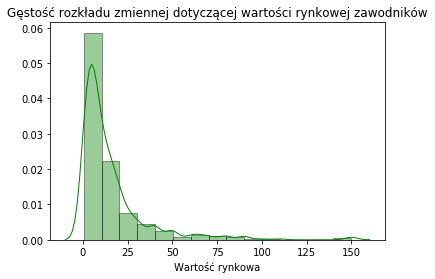

In [134]:
sns.distplot(data['market_value'][1:], hist=True, kde=True, 
             bins=15, color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})
plt.title('Gęstość rozkładu zmiennej dotyczącej wartości rynkowej zawodników')
plt.xlabel('Wartość rynkowa')  

Text(1.5499999999999972, 0.5, 'Wartość rynkowa')

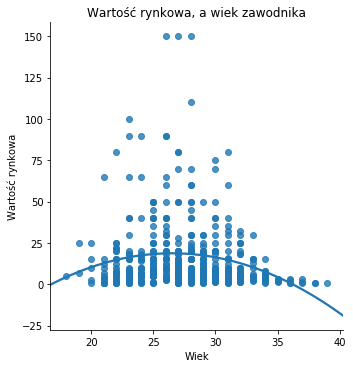

In [135]:
sns.lmplot(x ="age", y ="market_value", data = data, order = 2, ci = None)
plt.title('Wartość rynkowa, a wiek zawodnika')
plt.xlabel('Wiek')  
plt.ylabel('Wartość rynkowa')

Text(3.674999999999997, 0.5, 'Wartość rynkowa')

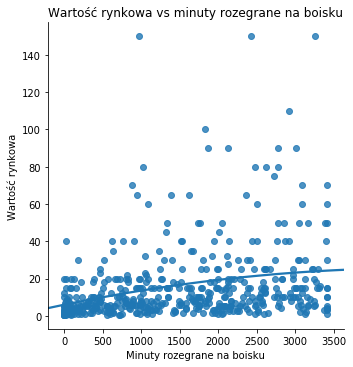

In [136]:
sns.lmplot(x ="minutes_played_overall", y ="market_value", data = data, order = 2, ci = None)
plt.title('Wartość rynkowa vs minuty rozegrane na boisku')
plt.xlabel('Minuty rozegrane na boisku')  
plt.ylabel('Wartość rynkowa')

Text(3.674999999999997, 0.5, 'Wartość rynkowa')

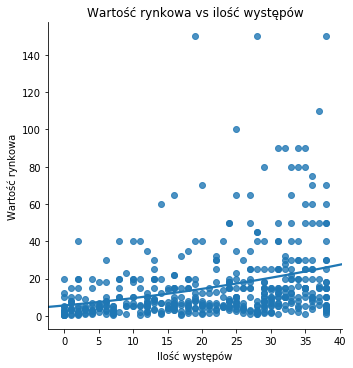

In [137]:
sns.lmplot(x ="appearances_overall", y ="market_value", data = data, order = 2, ci = None)
plt.title('Wartość rynkowa vs ilość występów')
plt.xlabel('Ilość występów')  
plt.ylabel('Wartość rynkowa')

Text(3.674999999999997, 0.5, 'Wartość rynkowa')

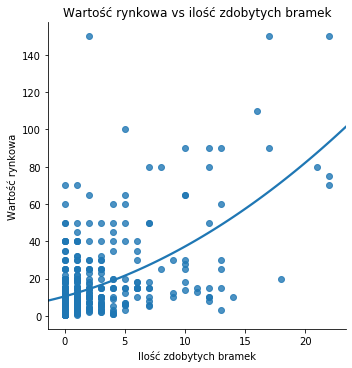

In [138]:
sns.lmplot(x ="goals_overall", y ="market_value", data = data, order = 2, ci = None)
plt.title('Wartość rynkowa vs ilość zdobytych bramek')
plt.xlabel('Ilość zdobytych bramek')  
plt.ylabel('Wartość rynkowa')

Text(3.674999999999997, 0.5, 'Wartość rynkowa')

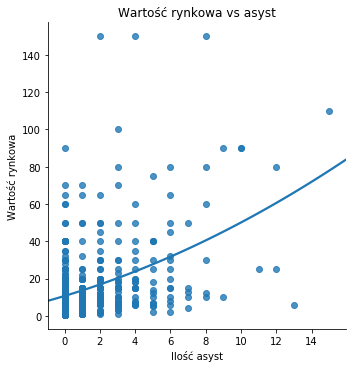

In [139]:
sns.lmplot(x ="assists_overall", y ="market_value", data = data, order = 2, ci = None)
plt.title('Wartość rynkowa vs asyst')
plt.xlabel('Ilość asyst')  
plt.ylabel('Wartość rynkowa')

Teraz sprawdzimy czy dochodzi do korelacji pomiędzy naszymi zmiennymi. Użyta do tego zostanie macierz korelacji.


In [140]:
corr_matrix = data.iloc[:].corr()

In [141]:
corr_matrix

,market_value,age,position_in_league,minutes_played_overall,appearances_overall,goals_overall,assists_overall,clean_sheets_overall,yellow_cards_overall,red_cards_overall
market_value,1.000000,-0.098470,-0.521057,0.284440,0.310289,0.553625,0.418805,0.516755,0.046414,-0.026306
age,-0.098470,1.000000,0.023426,0.001422,-0.051098,-0.034314,-0.080275,-0.028511,-0.010792,0.015647
position_in_league,-0.521057,0.023426,1.000000,-0.048874,-0.064691,-0.194432,-0.233475,-0.435791,0.036862,0.015959
minutes_played_overall,0.284440,0.001422,-0.048874,1.000000,0.938247,0.405374,0.429959,0.707146,0.570121,0.181982
appearances_overall,0.310289,-0.051098,-0.064691,0.938247,1.000000,0.462600,0.479600,0.751292,0.535463,0.165246
goals_overall,0.553625,-0.034314,-0.194432,0.405374,0.462600,1.000000,0.563740,0.450460,0.180313,0.089667
assists_overall,0.418805,-0.080275,-0.233475,0.429959,0.479600,0.563740,1.000000,0.485431,0.223837,0.081782
clean_sheets_overall,0.516755,-0.028511,-0.435791,0.707146,0.751292,0.450460,0.485431,1.000000,0.305715,0.067415
yellow_cards_overall,0.046414,-0.010792,0.036862,0.570121,0.535463,0.180313,0.223837,0.305715,1.000000,0.350777
red_cards_overall,-0.026306,0.015647,0.015959,0.181982,0.165246,0.089667,0.081782,0.067415,0.350777,1.000000


Z samej macierzy ciężko znaleźć te wartości korelacji, które są wysokie, dlatego macierz korelacji zostanie zmodyfikowana.

In [143]:
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

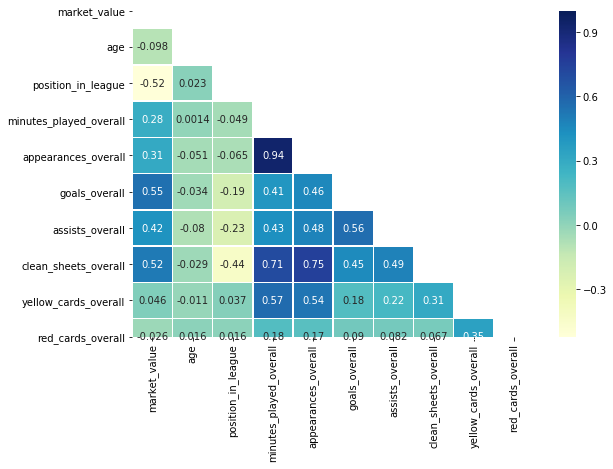

In [142]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, ax=ax, mask = mask, cmap="YlGnBu")

Tutaj dla zoobrazowania wykresy pudełkowe, służące do analizy rozkładu.

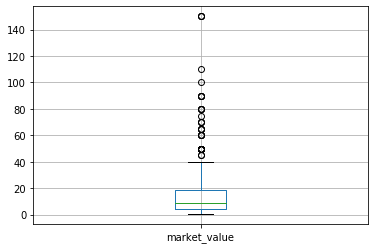

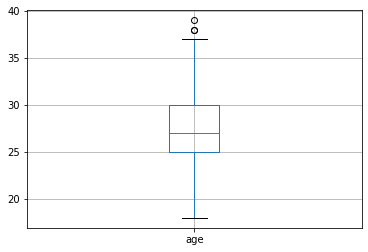

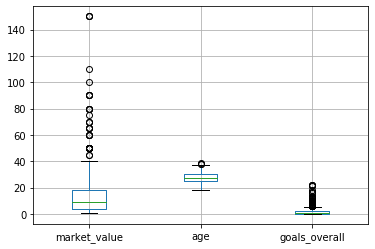

In [145]:
plt.boxplot=data.boxplot('market_value')
plt.show()
plt.boxplot=data.boxplot('age')
plt.show()
boxplot=data.boxplot(column=['market_value','age','goals_overall'])
plt.show()


# 2. Regresja liniowa

Oszacowano regresję liniową dla zbioru danych, gdzie zmienną objaśnianą jest "market_value", zaś pozostałe zmienne to zmienne objaśniające.

In [31]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [146]:
results = smf.ols('market_value ~ age + position_in_league + minutes_played_overall + appearances_overall + goals_overall + assists_overall + clean_sheets_overall + yellow_cards_overall + red_cards_overall ', data=data).fit()

In [147]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           market_value   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     57.39
Date:                Thu, 13 Feb 2020   Prob (F-statistic):           2.59e-70
Time:                        21:31:40   Log-Likelihood:                -1969.3
No. Observations:                 484   AIC:                             3959.
Df Residuals:                     474   BIC:                             4000.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 32

Następnym krokiem jaki poczyniliśmy było utworzenie zmiennych zerojedynkowych dla zmiennej "position" oraz oszacowanie modelu regresji.

In [148]:
data2 = pd.get_dummies(data, columns=['position'])
data2

,market_value,age,position_in_league,minutes_played_overall,appearances_overall,goals_overall,assists_overall,clean_sheets_overall,yellow_cards_overall,red_cards_overall,position_Defender,position_Forward,position_Goalkeeper,position_Midfielder
0,1.0,39,14,1080,12,0,0,4,2,0,0,0,1,0
1,4.0,30,13,3420,38,0,0,11,1,0,0,0,1,0
2,20.0,27,5,2835,32,0,0,7,0,0,0,0,1,0
3,8.0,27,17,3060,34,0,0,6,2,0,0,0,1,0
4,8.0,32,14,2160,24,0,0,5,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,5.0,30,11,22,2,0,0,0,1,0,0,1,0,0
480,6.0,32,19,1260,16,5,3,3,3,0,0,1,0,0
481,60.0,31,3,1092,14,5,0,5,0,0,0,1,0,0
482,10.0,30,10,454,12,0,0,2,2,0,0,1,0,0


In [149]:
results2 = smf.ols('market_value ~ age + position_in_league + minutes_played_overall + appearances_overall + goals_overall + assists_overall + clean_sheets_overall + yellow_cards_overall + red_cards_overall+position_Defender+position_Forward+position_Goalkeeper+position_Midfielder ', data=data2).fit()

In [150]:
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:           market_value   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     42.99
Date:                Thu, 13 Feb 2020   Prob (F-statistic):           5.74e-68
Time:                        21:31:51   Log-Likelihood:                -1968.7
No. Observations:                 484   AIC:                             3963.
Df Residuals:                     471   BIC:                             4018.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 26

Wyrzucamy zmienną skorelowaną "appearances_overall", która jest mniej miarodajna w porównaniu do "minutes_played_overall", ponieważ już samo wejście na boisko zaliczane jest jako występ.Następnie ponownie szacujemy model.

In [151]:
results3 = smf.ols('market_value ~ age + position_in_league + minutes_played_overall + goals_overall + assists_overall + clean_sheets_overall + yellow_cards_overall + red_cards_overall+position_Defender+position_Forward+position_Goalkeeper+position_Midfielder ', data=data2).fit()

In [152]:
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:           market_value   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.21
Date:                Thu, 13 Feb 2020   Prob (F-statistic):           6.17e-68
Time:                        21:32:05   Log-Likelihood:                -1970.8
No. Observations:                 484   AIC:                             3966.
Df Residuals:                     472   BIC:                             4016.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 24

In [153]:
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

In [154]:
results4 = smf.ols('market_value ~ age + position_in_league + minutes_played_overall + goals_overall + assists_overall + clean_sheets_overall + yellow_cards_overall +position_Defender+position_Forward+position_Goalkeeper+position_Midfielder ', data=data2).fit()
results5 = smf.ols('market_value ~ age + position_in_league + minutes_played_overall + goals_overall  + clean_sheets_overall + yellow_cards_overall +position_Defender+position_Forward+position_Goalkeeper+position_Midfielder ', data=data2).fit()
results6 = smf.ols('market_value ~ age + position_in_league  + goals_overall + clean_sheets_overall + yellow_cards_overall +position_Defender+position_Forward+position_Goalkeeper+position_Midfielder ', data=data2).fit()

dfoutput = summary_col([results2,results3,results4,results5,results6],stars=True,info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                             'R2':lambda x: "{:.2f}".format(x.rsquared)})
print(dfoutput)


                       market_value I market_value II market_value III market_value IIII market_value IIIII
-----------------------------------------------------------------------------------------------------------
Intercept              26.0788***     24.5145***      24.6120***       24.7689***        24.7669***        
                       (4.3760)       (4.3219)        (4.3265)         (4.3201)          (4.3155)          
age                    -0.4004**      -0.3765**       -0.3830**        -0.3879**         -0.3887**         
                       (0.1798)       (0.1800)        (0.1802)         (0.1800)          (0.1796)          
appearances_overall    -0.4265**                                                                           
                       (0.2100)                                                                            
assists_overall        0.3322         0.2947          0.2954                                               
                       (0.3

Sprawdzimy teraz, które model ma najlepsze dopasowane R2 spośród modeli umieszczonych powyżej. Do dalszej analizy postanowiłem wybrać model results3 ponieważ posiada on prawie najwyższe dopasowane R2 oraz ma usuniętą zmienną objaśniającą silnie skorelowaną z inną.

In [89]:
print("rsquared_adj\n",results2.rsquared_adj)
print("rsquared_adj\n",results3.rsquared_adj)
print("rsquared_adj\n",results4.rsquared_adj)
print("rsquared_adj\n",results5.rsquared_adj)
print("rsquared_adj\n",results6.rsquared_adj)

rsquared_adj
 0.5123936841817727
rsquared_adj
 0.5105590796869663
rsquared_adj
 0.5073192499728214
rsquared_adj
 0.5061620399506219
rsquared_adj
 0.5065616217827721
rsquared_adj
 0.5075918769127497


In [155]:
model=smf.ols('market_value ~ age + position_in_league + minutes_played_overall + goals_overall + assists_overall + clean_sheets_overall + yellow_cards_overall + red_cards_overall+position_Defender+position_Forward+position_Goalkeeper+position_Midfielder ', data=data2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           market_value   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.21
Date:                Thu, 13 Feb 2020   Prob (F-statistic):           6.17e-68
Time:                        21:34:56   Log-Likelihood:                -1970.8
No. Observations:                 484   AIC:                             3966.
Df Residuals:                     472   BIC:                             4016.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 24

# 3. Testy diagnostyczne

In [39]:
import numpy as np
import statsmodels
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [40]:
from __future__ import print_function
from statsmodels.compat import lzip
import statsmodels
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt


Test na liniową formę funkcyjną.

Liniowa forma funkcyjna. Próbowałem zaimplementować z bibliotek test Harvey-Collier jednak nie chciał mi on działać, dlatego sprawdziłem liniową formę funkcyjną w R, gdzie p-value wyniosło 2.2e-16 czyli znacznie poniżej zera stąd wniosek o braku liniowej formy funkcyjnej. Utworzyłem jedynie wykres, gdzie widać, że wartości przewidywane w pewnym momencie znacznie sie rozbiegają co może potwierdzać brak liniowej formy funkcyjnej.

In [156]:
pred_val = model2.fittedvalues.copy()
true_val = data['market_value'].values.copy()
residual = true_val - pred_val
residual

0      -0.843528
1      -8.758267
2      -0.062110
3       4.091248
4       2.022793
         ...    
479    -1.908958
480    -3.722841
481    28.240872
482     2.855350
483   -16.011830
Length: 484, dtype: float64

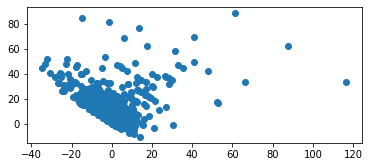

In [157]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, pred_val)

Test Ljunga-Boxa na autokorelację. Odrzucamy hipotezę o istnieniu autokorelacji, ponieważ p-value 6.90941902e-07.

In [158]:
from statsmodels.stats import diagnostic as diag
diag.acorr_ljungbox(model.resid , lags = 1) 

(array([24.64022894]), array([6.90941902e-07]))

Test Jarque-Bera ma p-value=0, przy założeniu o poziomie istotności równym 0.05 odrzucamy h0 mowiące o normalnym rozkładzie reszt. Jednak naszą prób ęmożna uznać za dużą, ponieważ posiada 484 obserwacje, stąd zakładamy jednak rozkład normalny reszt.

In [159]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(model.resid)
lzip(name, test)

[('Jarque-Bera', 4399.787653006073),
 ('Chi^2 two-tail prob.', 0.0),
 ('Skew', 2.3576102167795567),
 ('Kurtosis', 16.99778499769732)]

Test Breuscha-Pagana na homoscedastyczność. Mamy heteroscedastyczność gdyż p-value mniejze od 0.05.

In [160]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, results3.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 53.90517869454181),
 ('p-value', 2.8412950245520624e-07),
 ('f-value', 5.377935512113852),
 ('f p-value', 4.5555050472174846e-08)]

Test Goldfelda-Quandta na homoscedastyczność. Wynik podobny jak w teście Breuscha-Pagana, mamy heteroscedastyczność.

In [161]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, results3.model.exog)
lzip(name, test)

[('F statistic', 4.024667458479249), ('p-value', 9.863489243469573e-25)]

Z tego powodu zastosujemy macierz odporną.


In [162]:
model2 = smf.ols('market_value ~ age + position_in_league + minutes_played_overall + appearances_overall + goals_overall + assists_overall + clean_sheets_overall + yellow_cards_overall + red_cards_overall+position_Defender+position_Forward+position_Goalkeeper+position_Midfielder ', data= data2).fit(cov_type='HC3')
    
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           market_value   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     54.04
Date:                Thu, 13 Feb 2020   Prob (F-statistic):           1.07e-84
Time:                        21:46:01   Log-Likelihood:                -1968.7
No. Observations:                 484   AIC:                             3963.
Df Residuals:                     471   BIC:                             4018.
Df Model:                          12                                         
Covariance Type:                  HC3                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 26.0788      4.239      6.152      0.000      17.770      34.388
age                       -0.4004      0.157     -2.547      0.011      -0.708      -0.092
position_in_league        -1.1877      0.142     -8.366      0.000      -1.466      -0.909
minutes_played_overall     0.0041      0.003      1.582      0.114      -0.001       0.009
appearances_overall       -0.4265      0.225     -1.892      0.058      -0.868       0.015
goals_overall              2.1845      0.466      4.683      0.000       1.270       3.099
assists_overall            0.3322      0.574      0.579      0.563      -0.792       1.457
clean_sheets_overall       1.0058      0.368      2.731      0.006       0.284       1.728
yellow_cards_overall      -0.4865      0.311     -1.565      0.118      -1.096       0.123
red_cards_overall         -3.3518      2.237     -1.498      0.134      -7.737       1.033
position_Defender          5.7124      1.271      4.495      0.000       3.222       8.203
position_Forward           7.1550      2.160      3.313      0.001       2.922      11.388
position_Goalkeeper        5.6053      2.058      2.723      0.006       1.571       9.639
position_Midfielder        7.6061      1.379      5.517      0.000       4.904      10.308
==============================================================================
Omnibus:                      294.498   Durbin-Watson:                   1.558
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4428.532
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                      17.057   Cond. No.                     3.23e+18
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The smallest eigenvalue is 1.59e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Wartości dopasowane vs reszty 

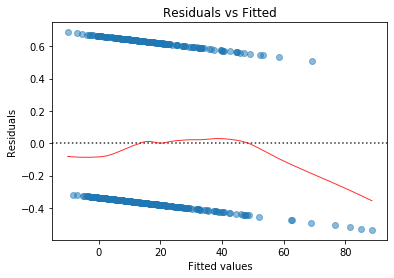

In [163]:
model_fitted_y = model2.fittedvalues
# model residuals
model_residuals = model2.resid
# normalized residuals
model_norm_residuals = model2.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model2.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model2.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, data2.columns[-1], data=data2,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

Niestety okazało się, że model nie spełnia wszystkich założeń KMRL, a głównie nie posiada liniowej formy funkcyjnej, przez co wyniki oszacowań nie oddają rzeczywistości. Pojawiła się również heteroskedastyczność, którą udało się usunąć poprzez zastosowanie odpowiedniej macierzy, ponadto wystąpiła autokorelacja pomiędzy zmiennymi objaśniającymi w modelu, jednak zmienna silnie skorelowana została usunięta.